# Load data 

In [3]:
booksPath = "/Users/chenwisely/notebook/Books.txt"
charPath = "/Users/chenwisely/notebook/Characters.txt"
edgePath = "/Users/chenwisely/notebook/Edges.txt"

In [4]:
books = sc.textFile(booksPath)
books.take(10)

['Vertex 6487: AA2 35',
 'Vertex 6488: M/PRM 35',
 'Vertex 6489: M/PRM 36',
 'Vertex 6490: M/PRM 37',
 'Vertex 6491: WI? 9',
 'Vertex 6492: AVF 4',
 'Vertex 6493: AVF 5',
 'Vertex 6494: H2 251',
 'Vertex 6495: H2 252',
 'Vertex 6496: COC 1']

In [5]:
characters = sc.textFile(charPath)
characters.take(10)

['Vertex 1: 24-HOUR MAN/EMMANUEL',
 'Vertex 2: 3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER',
 'Vertex 3: 4-D MAN/MERCURIO',
 'Vertex 4: 8-BALL/',
 'Vertex 5: A',
 "Vertex 6: A'YIN",
 'Vertex 7: ABBOTT, JACK',
 'Vertex 8: ABCISSA',
 'Vertex 9: ABEL',
 'Vertex 10: ABOMINATION/EMIL BLONSKY']

In [6]:
edges = sc.textFile(edgePath)
edges.take(10)

['*Vertices 19428 6486',
 '1 "24-HOUR MAN/EMMANUEL"',
 '2 "3-D MAN/CHARLES CHAN"',
 '3 "4-D MAN/MERCURIO"',
 '4 "8-BALL/"',
 '5 "A"',
 '6 "A\'YIN"',
 '7 "ABBOTT, JACK"',
 '8 "ABCISSA"',
 '9 "ABEL"']

In [7]:
def edgeFilter(row):
    if '*' in row or '"' in row:
        return False
    else:
        return True
    
edgesFiltered = edges.filter(edgeFilter)
edgesFiltered.take(10)

['1 6487',
 '2 6488 6489 6490 6491 6492 6493 6494 6495 6496',
 '3 6497 6498 6499 6500 6501 6502 6503 6504 6505',
 '4 6506 6507 6508',
 '5 6509 6510 6511',
 '6 6512 6513 6514 6515',
 '7 6516',
 '8 6517 6518',
 '9 6519 6520',
 '10 6521 6522 6523 6524 6525 6526 6527 6528 6529 6530 6531 6532 6533 6534 6535']

In [8]:
charBookMap = edgesFiltered.map(lambda x:x.split())\
                           .map(lambda x: (x[0] , x[1:]))
charBookMap.take(10)

[('1', ['6487']),
 ('2',
  ['6488', '6489', '6490', '6491', '6492', '6493', '6494', '6495', '6496']),
 ('3',
  ['6497', '6498', '6499', '6500', '6501', '6502', '6503', '6504', '6505']),
 ('4', ['6506', '6507', '6508']),
 ('5', ['6509', '6510', '6511']),
 ('6', ['6512', '6513', '6514', '6515']),
 ('7', ['6516']),
 ('8', ['6517', '6518']),
 ('9', ['6519', '6520']),
 ('10',
  ['6521',
   '6522',
   '6523',
   '6524',
   '6525',
   '6526',
   '6527',
   '6528',
   '6529',
   '6530',
   '6531',
   '6532',
   '6533',
   '6534',
   '6535'])]

In [9]:
# create a id <-> Name lookup table 
def charParse(row):
    row = row.split(":")
    return (row[0][7:],row[1].strip())

characterLookup = characters.map(charParse).collectAsMap()
characterLookup

{'1': '24-HOUR MAN/EMMANUEL',
 '2': '3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER',
 '3': '4-D MAN/MERCURIO',
 '4': '8-BALL/',
 '5': 'A',
 '6': "A'YIN",
 '7': 'ABBOTT, JACK',
 '8': 'ABCISSA',
 '9': 'ABEL',
 '10': 'ABOMINATION/EMIL BLONSKY',
 '11': 'ABOMINATION | MUTANT X-VERSE',
 '12': 'ABOMINATRIX',
 '13': 'ABRAXAS',
 '14': 'ADAM 3,031',
 '15': 'ABSALOM',
 '16': 'ABSORBING MAN/CARL CRUSHER CREEL',
 '17': 'ABSORBING MAN | MUTANT X-VERSE',
 '18': 'ACBA',
 '19': 'ACHEBE, REVEREND DOCTOR MICHAEL IBN AL-HAJJ',
 '20': 'ACHILLES',
 '21': 'ACHILLES II/HELMUT',
 '22': 'ACROBAT/CARL ZANTE',
 '23': 'ADAM X',
 '24': 'ADAMS, CINDY',
 '25': 'ADAMS, CONGRESSMAN HENRY',
 '26': 'ADAMS, GEORGE',
 '27': 'ADAMS, MARTHA',
 '28': 'ADAMS, NICOLE NIKKI',
 '29': 'ADAMSON, JASON',
 '30': 'ADAMSON, REBECCA',
 '31': 'ADMIRAL PROTOCOL/',
 '32': 'ADORA',
 '33': 'ADORA CLONE',
 '34': 'ADRIA',
 '35': 'ADVA',
 '36': 'ADVENT/KYLE GROBE',
 '37': 'ADVERSARY',
 '38': 'AEGIS/TREY ROLLINS',
 '39': 'AENTAROS',
 '40': 'AFTERLI

In [14]:
# find the most infulence hero
characterStrength = charBookMap.mapValues(lambda x:len(x))\
                               .map(lambda x: (characterLookup[x[0]],x[1]))\
                               .reduceByKey(lambda x,y:x+y)\
                               .sortBy(lambda x: -x[1])
characterStrength.take(10)

[('SPIDER-MAN/PETER PARKER', 1625),
 ('CAPTAIN AMERICA', 1367),
 ('IRON MAN/TONY STARK', 1168),
 ('THING/BENJAMIN J. GRIMM', 990),
 ('THOR/DR. DONALD BLAKE/SIGURD JARLSON II/JAKE OLSON/LOREN OLSON', 965),
 ('HUMAN TORCH/JOHNNY STORM', 908),
 ('MR. FANTASTIC/REED RICHARDS', 875),
 ('HULK/DR. ROBERT BRUCE BANNER', 841),
 ('WOLVERINE/LOGAN', 820),
 ('INVISIBLE WOMAN/SUE STORM RICHARDS', 782)]

# Building co-occurence Network

# Step1

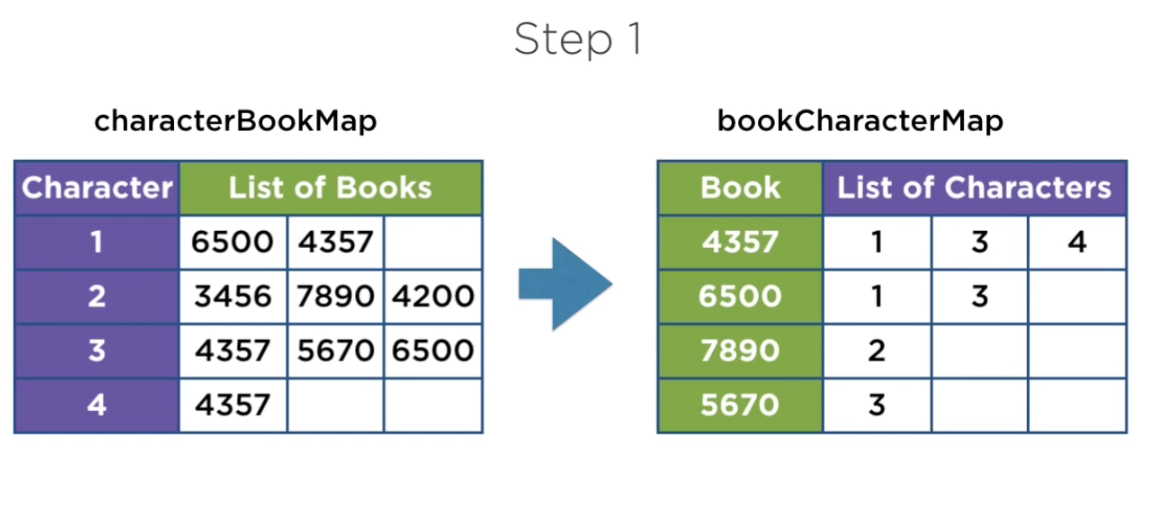

In [20]:
# flatMapValue
bookCharMapStep1Tmp = charBookMap.flatMapValues(lambda x:x)
bookCharMapStep1Tmp.take(10)

[('1', '6487'),
 ('2', '6488'),
 ('2', '6489'),
 ('2', '6490'),
 ('2', '6491'),
 ('2', '6492'),
 ('2', '6493'),
 ('2', '6494'),
 ('2', '6495'),
 ('2', '6496')]

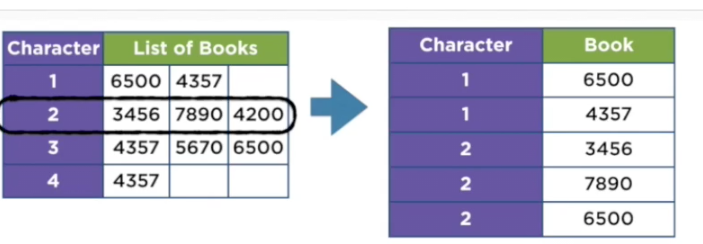

In [25]:
bookCharMapStep1 = bookCharMapStep1Tmp.map(lambda x: (x[1] , x[0]))\
                                   .reduceByKey(lambda x,y: x+","+y)\
                                   .mapValues(lambda x:x.split(","))
bookCharMapStep1.take(10)

[('6490', ['2']),
 ('6493',
  ['2',
   '154',
   '859',
   '2186',
   '2399',
   '2555',
   '3035',
   '3491',
   '4228',
   '6022',
   '6148']),
 ('6496',
  ['2',
   '66',
   '133',
   '155',
   '183',
   '274',
   '403',
   '505',
   '522',
   '533',
   '545',
   '592',
   '731',
   '824',
   '859',
   '867',
   '1116',
   '1127',
   '1231',
   '1265',
   '1289',
   '1347',
   '1369',
   '1383',
   '1425',
   '1480',
   '1535',
   '1587',
   '1602',
   '1649',
   '1805',
   '2069',
   '2184',
   '2199',
   '2273',
   '2295',
   '2397',
   '2399',
   '2430',
   '2438',
   '2449',
   '2548',
   '2557',
   '2603',
   '2613',
   '2614',
   '2650',
   '2658',
   '2664',
   '2689',
   '2728',
   '2931',
   '3008',
   '3210',
   '3220',
   '3233',
   '3319',
   '3594',
   '3662',
   '3712',
   '3750',
   '3757',
   '3805',
   '3950',
   '3955',
   '3986',
   '3989',
   '4024',
   '4132',
   '4188',
   '4204',
   '4366',
   '4441',
   '4454',
   '4589',
   '4603',
   '4607',
   '4731',
   '4

# Step 2

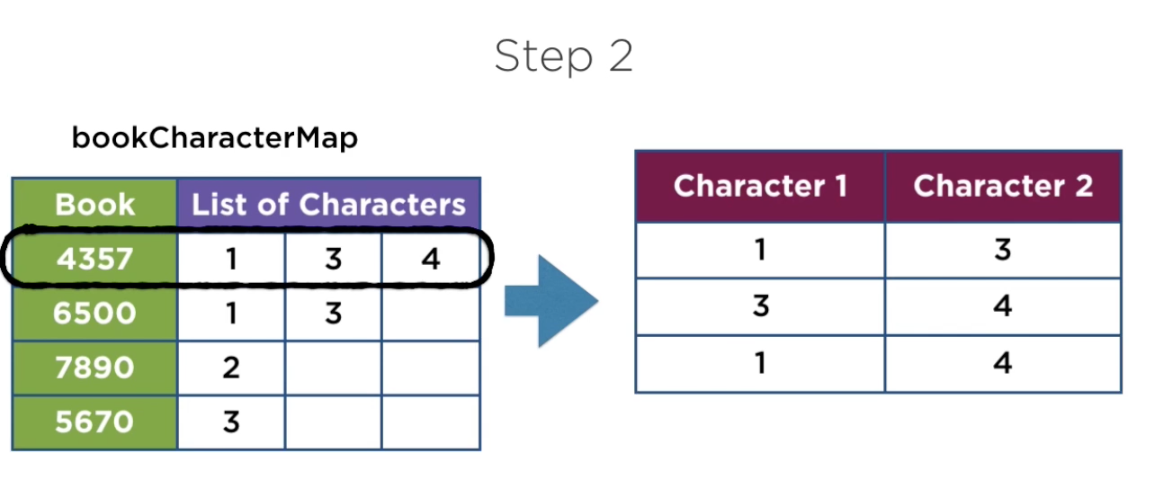

In [27]:
import itertools
coocurenceMap = bookCharMapStep1.flatMap(lambda x: list(itertools.combinations(x[1],2)))
coocurenceMap.take(10)

[('2', '154'),
 ('2', '859'),
 ('2', '2186'),
 ('2', '2399'),
 ('2', '2555'),
 ('2', '3035'),
 ('2', '3491'),
 ('2', '4228'),
 ('2', '6022'),
 ('2', '6148')]

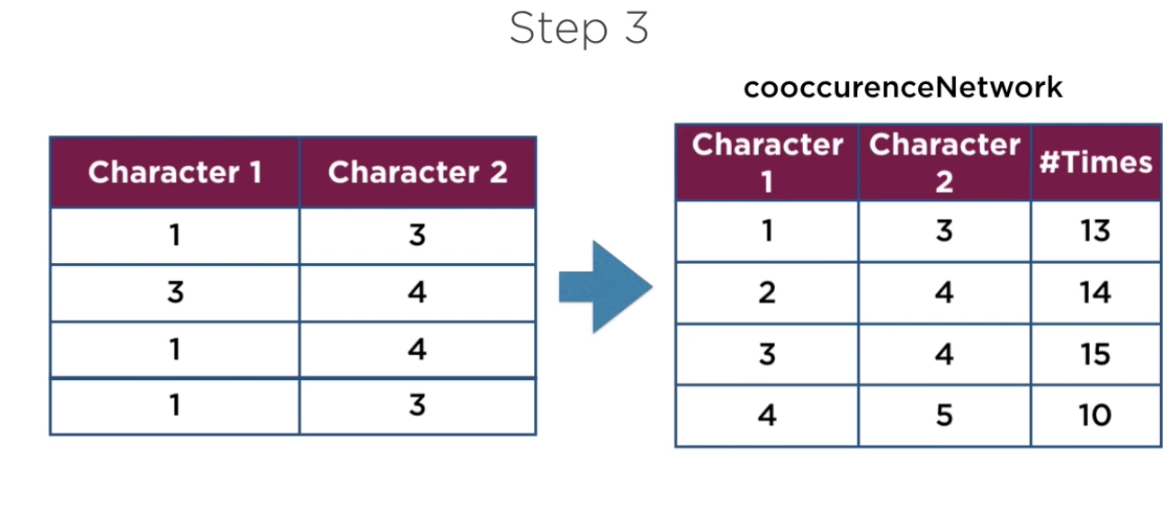

In [28]:
coocurenceMapStrength = coocurenceMap.map(lambda x: (x,1))\
                                     .reduceByKey(lambda x,y: x+y)
coocurenceMapStrength.take(10)

[(('2', '859'), 3),
 (('2', '2399'), 3),
 (('2', '2555'), 3),
 (('2', '3035'), 4),
 (('154', '2186'), 2),
 (('154', '3491'), 2),
 (('154', '4228'), 41),
 (('154', '6022'), 2),
 (('154', '6148'), 406),
 (('859', '2399'), 322)]

In [30]:
coocurenceMapStrength.sortBy(lambda x: -x[1]).take(10)

[(('2557', '5716'), 744),
 (('2557', '3805'), 713),
 (('3805', '5716'), 708),
 (('2650', '3805'), 701),
 (('2557', '2650'), 694),
 (('2650', '5716'), 668),
 (('5306', '6166'), 616),
 (('2959', '5306'), 526),
 (('859', '2664'), 446),
 (('4898', '6066'), 422)]

In [31]:
coocurenceEdges = coocurenceMapStrength.map(lambda x: (x[0][0] , x[0][1] , x[1]))
coocurenceEdges.take(10)

[('2', '859', 3),
 ('2', '2399', 3),
 ('2', '2555', 3),
 ('2', '3035', 4),
 ('154', '2186', 2),
 ('154', '3491', 2),
 ('154', '4228', 41),
 ('154', '6022', 2),
 ('154', '6148', 406),
 ('859', '2399', 322)]

# find out most relevant relationship

In [34]:
sortedCoocurrence = coocurenceEdges.sortBy(lambda x:-x[2])\
                                   .map(lambda x: (characterLookup[x[0]] , characterLookup[x[1]] , x[2]))
sortedCoocurrence.take(10)

[('HUMAN TORCH/JOHNNY STORM', 'THING/BENJAMIN J. GRIMM', 744),
 ('HUMAN TORCH/JOHNNY STORM', 'MR. FANTASTIC/REED RICHARDS', 713),
 ('MR. FANTASTIC/REED RICHARDS', 'THING/BENJAMIN J. GRIMM', 708),
 ('INVISIBLE WOMAN/SUE STORM RICHARDS', 'MR. FANTASTIC/REED RICHARDS', 701),
 ('HUMAN TORCH/JOHNNY STORM', 'INVISIBLE WOMAN/SUE STORM RICHARDS', 694),
 ('INVISIBLE WOMAN/SUE STORM RICHARDS', 'THING/BENJAMIN J. GRIMM', 668),
 ('SPIDER-MAN/PETER PARKER', 'WATSON-PARKER, MARY JANE', 616),
 ('JAMESON, J. JONAH', 'SPIDER-MAN/PETER PARKER', 526),
 ('CAPTAIN AMERICA', 'IRON MAN/TONY STARK', 446),
 ('SCARLET WITCH/WANDA MAXIMOFF', 'VISION', 422)]

In [35]:
# find out SPIDER-man's relationship
sortedCoocurrence.filter(lambda x: 'SPIDER-MAN/PETER PARKER' in x).take(10)

[('SPIDER-MAN/PETER PARKER', 'WATSON-PARKER, MARY JANE', 616),
 ('JAMESON, J. JONAH', 'SPIDER-MAN/PETER PARKER', 526),
 ('PARKER, MAY', 'SPIDER-MAN/PETER PARKER', 380),
 ('ROBERTSON, JOE', 'SPIDER-MAN/PETER PARKER', 356),
 ('LEEDS, BETTY BRANT', 'SPIDER-MAN/PETER PARKER', 249),
 ('SPIDER-MAN/PETER PARKER', 'THOMPSON, EUGENE FLASH', 240),
 ('OSBORN, HARRY', 'SPIDER-MAN/PETER PARKER', 181),
 ('HUMAN TORCH/JOHNNY STORM', 'SPIDER-MAN/PETER PARKER', 147),
 ('CAPTAIN AMERICA', 'SPIDER-MAN/PETER PARKER', 145),
 ('OSBORN, LIZ ALLAN', 'SPIDER-MAN/PETER PARKER', 138)]

In [36]:
sortedCoocurrence.filter(lambda x: 'CAPTAIN AMERICA' in x).take(10)

[('CAPTAIN AMERICA', 'IRON MAN/TONY STARK', 446),
 ('CAPTAIN AMERICA',
  'THOR/DR. DONALD BLAKE/SIGURD JARLSON II/JAKE OLSON/LOREN OLSON',
  386),
 ('CAPTAIN AMERICA', 'VISION', 385),
 ('CAPTAIN AMERICA', 'WASP/JANET VAN DYNE PYM', 384),
 ('CAPTAIN AMERICA', 'SCARLET WITCH/WANDA MAXIMOFF', 374),
 ('CAPTAIN AMERICA', 'HAWK', 322),
 ('ANT-MAN/DR. HENRY J. PYM', 'CAPTAIN AMERICA', 295),
 ('CAPTAIN AMERICA', 'JARVIS, EDWIN', 244),
 ('CAPTAIN AMERICA', 'WONDER MAN/SIMON WILLIAMS', 216),
 ('CAPTAIN AMERICA', 'FALCON/SAM WILSON', 189)]

In [39]:
sortedCoocurrence.map(lambda x:x[2]).stats()

(count: 168267, mean: 3.386106604384635, stdev: 10.918482065185609, max: 744.0, min: 1.0)

In [42]:
sortedCoocurrence.map(lambda x:int(x[2]/10)).countByValue()

defaultdict(int,
            {0: 159249,
             1: 5621,
             2: 1405,
             3: 641,
             4: 375,
             5: 218,
             6: 162,
             7: 126,
             8: 82,
             9: 78,
             10: 44,
             11: 41,
             12: 45,
             13: 17,
             14: 19,
             15: 16,
             16: 11,
             17: 7,
             18: 17,
             19: 3,
             20: 9,
             21: 5,
             22: 5,
             23: 6,
             24: 7,
             25: 5,
             26: 8,
             27: 3,
             28: 2,
             29: 5,
             30: 7,
             31: 2,
             32: 1,
             33: 3,
             34: 2,
             35: 1,
             37: 2,
             38: 5,
             39: 1,
             40: 1,
             42: 1,
             44: 1,
             52: 1,
             61: 1,
             66: 1,
             69: 1,
             70: 2,
             71: 1,
  

In [49]:
import networkx as nx 
G=nx.Graph()
edges=sortedCoocurrence.map(lambda x:(x[0],x[1],{'weight':1000/x[2]})).take(50)
edges

[('HUMAN TORCH/JOHNNY STORM',
  'THING/BENJAMIN J. GRIMM',
  {'weight': 1.3440860215053763}),
 ('HUMAN TORCH/JOHNNY STORM',
  'MR. FANTASTIC/REED RICHARDS',
  {'weight': 1.402524544179523}),
 ('MR. FANTASTIC/REED RICHARDS',
  'THING/BENJAMIN J. GRIMM',
  {'weight': 1.4124293785310735}),
 ('INVISIBLE WOMAN/SUE STORM RICHARDS',
  'MR. FANTASTIC/REED RICHARDS',
  {'weight': 1.4265335235378032}),
 ('HUMAN TORCH/JOHNNY STORM',
  'INVISIBLE WOMAN/SUE STORM RICHARDS',
  {'weight': 1.440922190201729}),
 ('INVISIBLE WOMAN/SUE STORM RICHARDS',
  'THING/BENJAMIN J. GRIMM',
  {'weight': 1.4970059880239521}),
 ('SPIDER-MAN/PETER PARKER',
  'WATSON-PARKER, MARY JANE',
  {'weight': 1.6233766233766234}),
 ('JAMESON, J. JONAH',
  'SPIDER-MAN/PETER PARKER',
  {'weight': 1.9011406844106464}),
 ('CAPTAIN AMERICA', 'IRON MAN/TONY STARK', {'weight': 2.242152466367713}),
 ('SCARLET WITCH/WANDA MAXIMOFF', 'VISION', {'weight': 2.3696682464454977}),
 ('ANT-MAN/DR. HENRY J. PYM',
  'WASP/JANET VAN DYNE PYM',
  {

In [50]:
G.add_edges_from(edges)

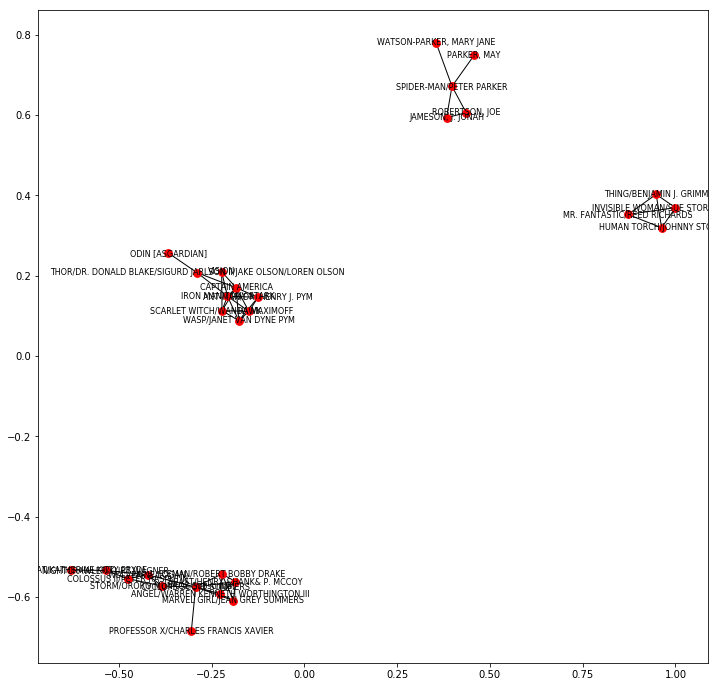

In [54]:
import matplotlib.pyplot as plt
plt.figure(3,figsize=(12,12)) 

nx.draw_networkx(G,pos=nx.spring_layout(G), node_size=60,font_size=8)
plt.show()